# Power Skill Extensions - Leading Technology Transformation - Applied Machine Learning - Utilização de autoencoders para encoding/decoding de dígitos manuscritos

##Exercício de fixação II - Autoencoders com a base MNIST

### Profs. Ahirton Lopes e Felipe Teodoro

**Autoencoder "Vanilla"**

Neste notebook vamos implementar um Autoencoder, aqui detalhado se utilizando do framework Keras e do dataset MNIST (http://yann.lecun.com/exdb/mnist/).

## Importando bibliotecas

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D

## Carregando os dados

Nós não precisamos dos rótulos visto que autoencoders são redes não supervisionadas.

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Normalizando os dados

Queremos os valores de pixels entre 0 e 1, ao invés de entre 0 e 255 (RGB).

In [3]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Achatar as imagens para as redes totalmente conectadas

In [4]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

___

# **Construindo nosso Autoencoder**

### Criando a rede

A primeira rede é o autoencoder mais simples. Tem três camadas: entrada - codificado - decodificado.

In [5]:
input_size = 784
hidden_size = 64
output_size = 784

In [6]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

### Treinamento

In [7]:
epochs = 10
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0745 - val_loss: 0.0229
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0202 - val_loss: 0.0132
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0121 - val_loss: 0.0086
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0082 - val_loss: 0.0066
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0065 - val_loss: 0.0056
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0056 - val_loss: 0.0050
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0044 - val_loss: 0.0043


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


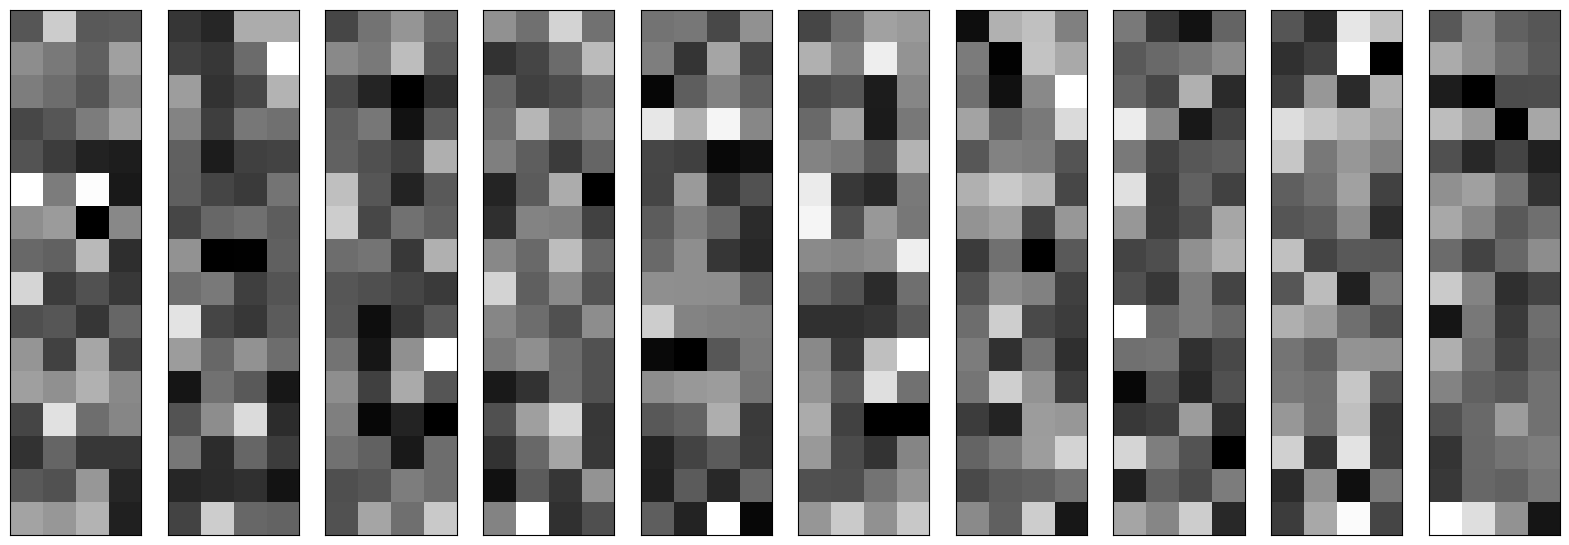

In [8]:
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Predição no dataset de teste

In [9]:
decoded_imgs = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


### Plot

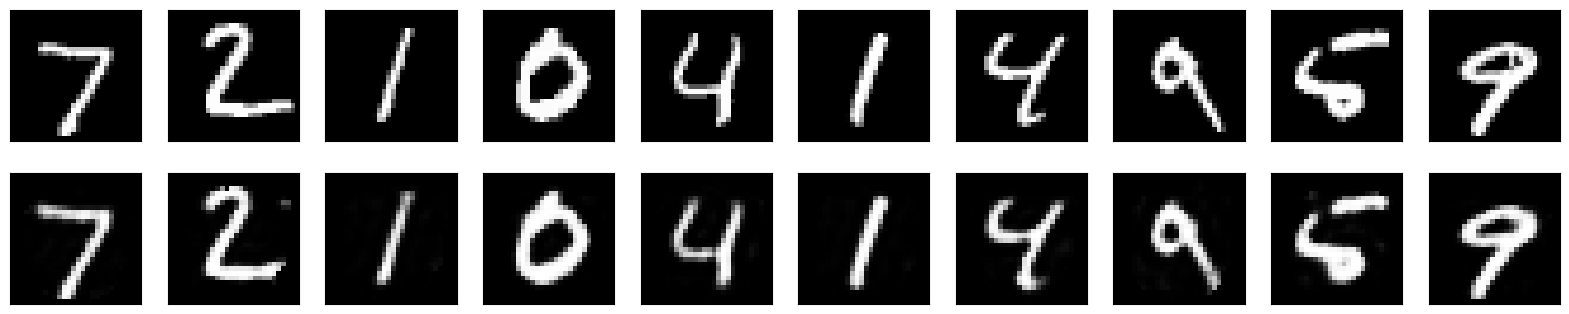

In [10]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):

    # imagens originais

    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # imagens reconstruídas

    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### Plotando as perdas

dict_keys(['loss', 'val_loss'])


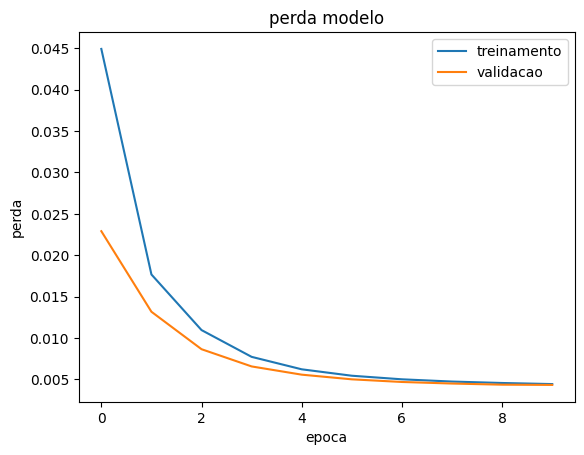

In [11]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('perda modelo')
plt.ylabel('perda')
plt.xlabel('epoca')
plt.legend(['treinamento', 'validacao'], loc='upper right')
plt.show()